<a href="https://colab.research.google.com/github/raginikhanduri/HW6/blob/main/Python_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework PyML1 Starter Code

### Ragini Khanduri

In [ ]:
# Notebook imports

import io
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from google.colab import files

### 1 - Read the Auto data

* Use pandas to read the Auto.csv file
* Print the first few rows
* Print the dimensions of the data


In [ ]:
# Read the Auto.csv file
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Auto.csv']))

Saving Auto.csv to Auto.csv


In [ ]:
# Print the first few rows
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140,3449,NaN,70.0,1,ford torino


In [ ]:
# Print dimesions of the data
df.ndim

2

### 2 - Some data exploration 

* Use describe on the mpg, weight, and year columns
* Write comments indicating the range and average of each column

Your observations here:

mpg
* Range: max - min = 46.6 - 9 = 37.6
* Average: 23.445918

weight
* Range: max - min = 5140 - 1613 = 3527
* Average: 2977.584184

year
* Range: max - min = 82 - 70 = 12
* Average: 76.010256


In [ ]:
# Describe() mpg
df.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [ ]:
# Describe() weight
df.weight.describe()

count     392.000000
mean     2977.584184
std       849.402560
min      1613.000000
25%      2225.250000
50%      2803.500000
75%      3614.750000
max      5140.000000
Name: weight, dtype: float64

In [ ]:
# Describe() year
df.year.describe()

count    390.000000
mean      76.010256
std        3.668093
min       70.000000
25%       73.000000
50%       76.000000
75%       79.000000
max       82.000000
Name: year, dtype: float64

### 3 - Explore data types

* Check the data types of all columns
* Change the cylinders column to categorical (cat codes)
* Change the origin column to categorical (not cat codes)
* Verify the changes with the dtypes attribute

In [ ]:
# Check data types
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object

In [ ]:
# Change cylinders to categorical (cat codes)
df.cylinders = df.cylinders.astype('category').cat.codes

# Change the origin column to categorical (not cat codes)
df.origin = df.cylinders.astype('category')

# Verify the changes
df.dtypes

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object

### 4 - Check for NAs

* Delete rows with NAs
* Print the new dimensions

In [ ]:
# Check for NAs
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    1
year            2
origin          0
name            0
dtype: int64

In [ ]:
# Drop rows with NAs
df = df.dropna()

# Output new dimensions
print('\nDimensions of data frame: ', df.shape)


Dimensions of data frame:  (389, 9)


### 5 - Modify columns

* Make a new column mpg_high which is categorical: 
    * = 1 if mpg > average mpg, else 0
* Delete the mpg and name columns
* Print the first few rows of the modified data frame

In [ ]:
# Create mpg_high column
df['mpg_high'] = np.where(df.mpg > np.mean(df.mpg), 1, 0)

# Delete mpg and name columns
df = df.drop(columns = ['mpg', 'name'])

# Print first few rows of modified dataframe 
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,4,0
1,4,350.0,165,3693,11.5,70.0,4,0
2,4,318.0,150,3436,11.0,70.0,4,0
3,4,304.0,150,3433,12.0,70.0,4,0
6,4,454.0,220,4354,9.0,70.0,4,0


### 6 - Data Exploration with graphs

* Check the distribution of high/low in column mpg_high using a seaborn catplot
* Using a relplot, plot horsepower on the x axis and weight on the y axis; setting hue and/or style to mpg_high
* Using a boxplot, plot mpg_high on the x axis and weight on the y axis
* For each graph, state one thing you learned about the data

Sample comments (answers vary):
* The two classes high and low mpg are fairly evenly distributed
* Cars with higher horsepower tend to weigh more
* Cars that weight more get lower mpg

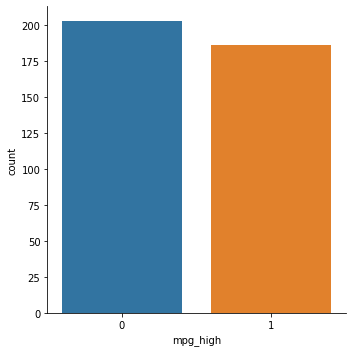

In [ ]:
# Catplot for mpg_high column 
sb.catplot(x = "mpg_high", kind = "count", data = df)

Catplot comments:

The vehicles are fairly evenly split between having high and low mileage. 

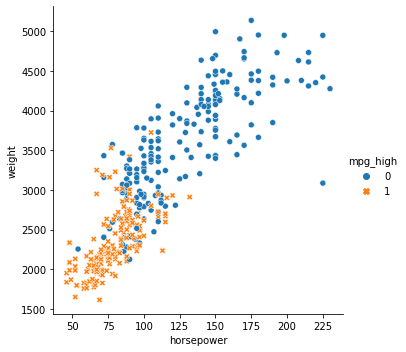

In [ ]:
# Relplot for horsepower vs weight
sb.relplot(x = "horsepower", y = "weight", data = df, hue = "mpg_high", style = "mpg_high")

Relplot comments:

Weight and horsepower seem to have a fairly strong positive correlation.

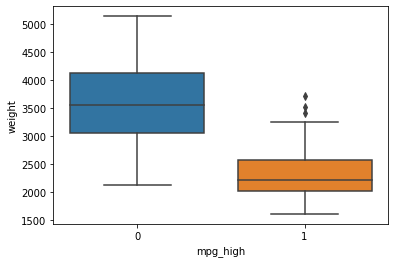

In [ ]:
# Boxplot for mpg_high vs weight
sb.boxplot(x = "mpg_high", y = "weight", data = df)

Boxplot comments:

Heavier vehicles seem to have a lower mileage, while lighter cars tend to get more mpg. 

### 7 - Make train/test split
* 80% train, 20% test
* Use seed 1234
* Use all remaining columns except mpg_high for the training data
* Print the dimensions of train and test

In [ ]:
# Train/test split 
from sklearn.model_selection import train_test_split

x = df.iloc[:, 0:6]
y = df.iloc[:, 7]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1234)

print('Train size:', x_train.shape)
print('Test size:', x_test.shape)

Train size: (311, 6)
Test size: (78, 6)


### 8 - Logistic Regression

* Train a logistic regression model using solver lbfgs
* Test and evaluate
* Print metrics with the classification report

In [ ]:
# Train the logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.9035369774919614

In [ ]:
# Make predictions
pred = clf.predict(x_test)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', accuracy_score(y_test, pred))
print('Precision score: ', precision_score(y_test, pred))
print('Recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

Accuracy score:  0.8589743589743589
Precision score:  0.7297297297297297
Recall score:  0.9642857142857143
f1 score:  0.8307692307692307


In [ ]:
# Print confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[40, 10],
       [ 1, 27]])

In [ ]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88        50
           1       0.73      0.96      0.83        28

    accuracy                           0.86        78
   macro avg       0.85      0.88      0.85        78
weighted avg       0.89      0.86      0.86        78



### 9 - Decision Tree

* Train a decision tree
* Test and evaluate
* Print metrics with the classification report
* Plot the tree if your system is compatible (optional) (https://scikit-learn.org/stable/modules/tree.html)

In [ ]:
# Train decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Make predictions
pred = clf.predict(x_test)

# Evaluate

print('Accuracy score: ', accuracy_score(y_test, pred))
print('Precision score: ', precision_score(y_test, pred))
print('Recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

Accuracy score:  0.9230769230769231
Precision score:  0.8666666666666667
Recall score:  0.9285714285714286
f1 score:  0.896551724137931


In [ ]:
# Print confusion matrix
confusion_matrix(y_test, pred)

array([[46,  4],
       [ 2, 26]])

In [ ]:
# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        50
           1       0.87      0.93      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.92      0.92        78
weighted avg       0.93      0.92      0.92        78



[Text(0.6597222222222222, 0.9444444444444444, 'X[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4583333333333333, 0.8333333333333334, 'X[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.3055555555555556, 0.7222222222222222, 'X[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.16666666666666666, 0.6111111111111112, 'X[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.05555555555555555, 0.5, 'X[0] <= 0.5\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.027777777777777776, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08333333333333333, 0.3888888888888889, 'X[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.05555555555555555, 0.2777777777777778, 'X[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.027777777777777776, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08333333333333333, 0.16666666666666666, 'X[3] <

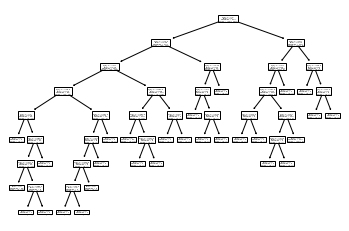

In [ ]:
# Plot the tree (optional)
tree.plot_tree(clf)


### Analysis

* Which algorithm performed better?
* Compare the accuracy, recall, and precision
* Give your analysis on why the better performing algorithm was able to outperform the other

### Your analysis here

The decision tree classification did a better job than logistic regression. Decision tree had better accuracy and precision, but the recall was higher in logistic regression. While the logistic regression model can separate binary classes pretty well, the decision tree's ability to make multiple branches allowed it to more accurately classify the test data. 